In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
from data_processing.start_experiment import *
from data_processing.read_data import *
from data_processing.gaussian import *

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
import GPy
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity
import time

# Reading and Running Simulations

In [5]:
file_name = "basic_chemotax.par"
output_file = "data_cellcount_testing.txt"

mcs = 1000
season_experiment = 1
season_duration = 1000

create_config(file_name, {'mcs': mcs,
                          'season_experiment': season_experiment,
                          'season_duration': season_duration, 
                         'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                         'evolsim': 1,
                        'mut_rate': 0.0})

In [6]:
execute_experiment(file_name,0)

Opening ../data/parameters/basic_chemotax.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 1000]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

In [7]:
all_cells = read_data("data_cellcount_testing.txt")

## Running simulations based on Latin Parameters

In [5]:
parameter_list = ['season_duration', 'gamma', 'mut_rate', 'T', 'target_area', 'gradnoise']

In [6]:
parameter_space = ParameterSpace([DiscreteParameter('season_duration',list(range(100,1001,10))), 
                                 DiscreteParameter('gamma',list(range(0,25))), 
                                 ContinuousParameter('mut_rate',0,0.5),
                                 ContinuousParameter('T',1,100),
                                 DiscreteParameter('target_area',list(range(1,101))),
                                 ContinuousParameter('gradnoise',0.25,0.99)])

In [7]:
mcs = 50*1000
num_experiments = 10

In [15]:
X = run_simulation_latin(parameter_space,num_experiments,0,{'mcs': mcs})

# Using Emukit with Simulations

## Create Emukit Model

In [9]:
def average_blob_size(all_cells):
    all_times = sorted(list(set([i.time for i in all_cells])))
    weighted_size_over_time = [weighted_blobsize_cells(all_cells,i) for i in all_times]
        
    average_weighted_size = np.mean(weighted_size_over_time)
    return average_weighted_size

In [10]:
file_names = ["latin_{}.par".format(i) for i in range(num_experiments)]

In [11]:
X = get_parameter_array(file_names,parameter_list)
Y = get_rewards(["data_cellcount_{}.txt".format(i) for i in range(10)],average_blob_size)

Time = 4800
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 4800
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 4750
End of season: there are 100 cells
Time = 4900
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


In [20]:
get_rewards(["latin/data_cellcount_{}.txt".format(i) for i in range(1)],average_blob_size)

array([[800.]])

In [36]:
season_duration = X[:,0].reshape(len(X),1)

In [37]:
emukit_model = get_emukit_model(season_duration,Y,lengthscale=100,variance=1000,noise_var=1e-1)

## Plot Gaussian Process Model

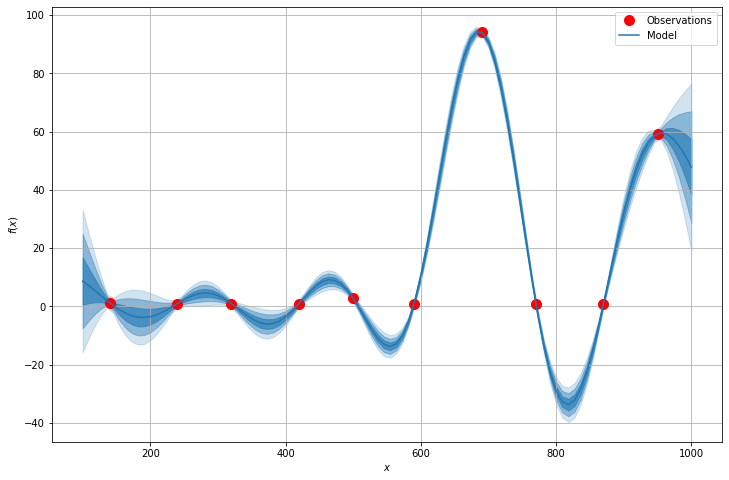

In [38]:
plot_gaussian_process(np.linspace(100,1000,100),emukit_model)

## Perform Sensitivity Analysis

In [18]:
get_sobol_indices(emukit_model,parameter_space)

NameError: name 'emukit_model' is not defined

Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
